SVR Prediction for custom input: [26.50341582]


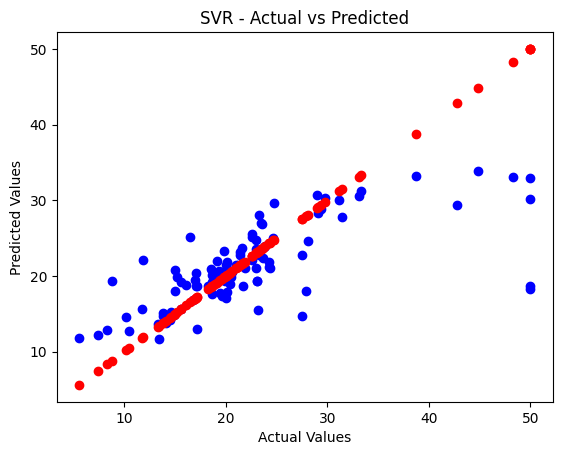

Random Forest Prediction for custom input: [21.1]


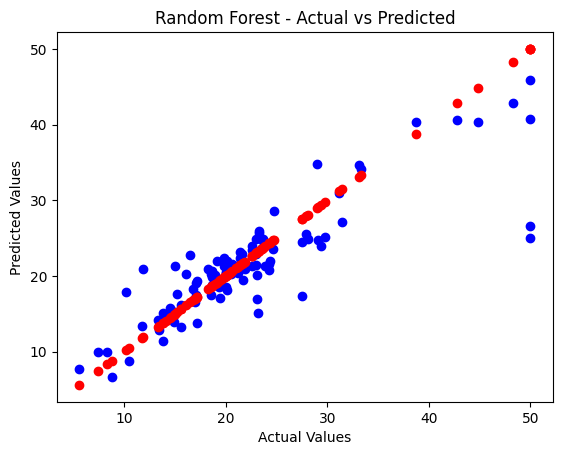

Decision Tree Prediction for custom input: [23.2]


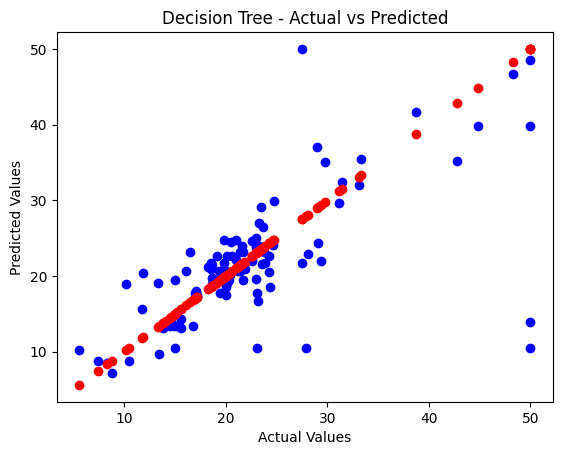

In [6]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('HousingData.csv')

# dataCleaning
dataset_cleaned = dataset.dropna(subset=["MEDV"])

# Splitting features (X) and target variable (y)
X = dataset_cleaned.drop("MEDV", axis=1).values
y = dataset_cleaned["MEDV"].values

# Handling missing values in the features by filling them with the median
X = np.nan_to_num(X, nan=np.nanmedian(X))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Taking custom input for predicting values
custom_input = np.array([[0.02, 20, 5.0, 0, 0.55, 6.0, 50, 3.0, 2, 300, 15, 380, 5]])

# Standardize the custom input
scaled_custom_input = scaler.transform(custom_input)

# Support Vector Regression (SVR)
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train_scaled, y_train)

# Predict a new value for the custom input using SVR
svr_prediction = svr_regressor.predict(scaled_custom_input)
print(f"SVR Prediction for custom input: {svr_prediction}")

# Scatter plot for SVR
plt.scatter(y_test, svr_regressor.predict(X_test_scaled), color='blue')
plt.scatter(y_test, y_test, color='red')
plt.title('SVR - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)

# Predict a new value for the custom input using Random Forest
rf_prediction = rf_regressor.predict(custom_input)
print(f"Random Forest Prediction for custom input: {rf_prediction}")

# Scatter plot for Random Forest
plt.scatter(y_test, rf_regressor.predict(X_test), color='blue')
plt.scatter(y_test, y_test, color='red')
plt.title('Random Forest - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

# Predict a new value for the custom input using Decision Tree
dt_prediction = dt_regressor.predict(custom_input)
print(f"Decision Tree Prediction for custom input: {dt_prediction}")

# Scatter plot for Decision Tree
plt.scatter(y_test, dt_regressor.predict(X_test), color='blue')
plt.scatter(y_test, y_test, color='red')
plt.title('Decision Tree - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

